<a href="https://colab.research.google.com/github/Bhavya171/LLM_From_Scratch/blob/main/Appendix_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appendix A - Pytorch**

### 1. Understanding Tensors
<ul>
<li>Represent a mathematical concept to generalise vectors and matrices in higher dimension.</li>
<li> Tensor is nothing but any box to arrange numbers into of any dimension like scalar is of rank 0, vector is of rank 1, matrix of 2 and so on.</li>
<li> Tensors are nothing but upgraded version of numpy arrays. Matlab vo mujhe arrays ke upar aur bhi functions type kuch perform karne mai help karenge</li>
<li> torch.tensor to create a tensor</li>
<li> .to method to convert into a particular datatype</li>
<li>.view() and .reshape() are same. But .view() requires the data to be next to each opther but .reshape works in any of the case bus kaise bhi desired shape dedega</li>
<li> .matmul to multiply 2 matrices</li>

</ul>

In [ ]:
import torch

In [ ]:
d0 = torch.tensor(1)
d0

tensor(1)

In [ ]:
d1 = torch.tensor([1,2])
d1

tensor([1, 2])

In [ ]:
d2 = torch.tensor([[1,2],[3,4]])
d2

tensor([[1, 2],
        [3, 4]])

In [ ]:
d3 = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
d3

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [ ]:
d3 = d3.to(float)
print(d3.shape)
d3 = d3.reshape(4,2)
print(d3.shape)
d3 = d3.view(2,2,2)
print(d3.shape)

torch.Size([2, 2, 2])
torch.Size([4, 2])
torch.Size([2, 2, 2])


In [ ]:
x = torch.tensor([[2,2],[2,2]])
print(d2.matmul(x))

tensor([[ 6,  6],
        [14, 14]])


In [ ]:
print(d2 @ x)     # @ also just multiplies the matrix-------------------- genuine

tensor([[ 6,  6],
        [14, 14]])


### 2. Seeing models as computation graphs
#### Pytorch's autamatic differentiation engine (autograd)
<ul>
<li>A computational graph lays out the seqeunce of calculations needed to compute the output of neural network </li>
<li>Computation graph can be interpreted a snothing but a work flow graph ki iske baad ye hora h iske baad ye. Sort of a block diagram maybe.</li>
</ul>

In [ ]:
import torch.nn.functional as f

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([4.9]) # started from 2.2 as it increasing the loss decreases
b = torch.tensor([0.0])
z = x1*w1 +b
a = torch.sigmoid(z)
loss = f.binary_cross_entropy(a,y)
loss

tensor(0.0046)

### 3. Automatic differentiation made easy


In [ ]:
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1*w1 +b
a = torch.sigmoid(z)

loss = f.binary_cross_entropy(a,y)

grad_w1 = grad(loss,w1,retain_graph = True) # retain_graph because we want them to
grad_b = grad(loss,b,retain_graph = True) # be present in the memory otherwise they are deleted

print(grad_w1)
print(grad_b)

loss.backward() # this computes the gradient automatically and very easily

print(w1.grad)
print(b.grad)


(tensor([-0.0898]),)
(tensor([-0.0817]),)
tensor([-0.0898])
tensor([-0.0817])


### 4. Implementing multilayer Neural Networks

In [ ]:
class NeuralNetwork(torch.nn.Module):
  def __init__(self,num_inputs,num_outputs):
    super().__init__()

    self.layers = torch.nn.Sequential(

        # 1st layer
        torch.nn.Linear(num_inputs,30),
        torch.nn.ReLU(),

        # 2nd layer
        torch.nn.Linear(30,20),
        torch.nn.ReLU(),

        # output layer
        torch.nn.Linear(20,num_outputs),

  )

  def forward(self,x):
    logits = self.layers(x)
    return logits




In [ ]:
model = NeuralNetwork(num_inputs=50,num_outputs=3)
print(model) # summary of the structure oft he model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [ ]:
# finding the number of trainable parametrs every parameter
num_params = sum( p.numel() for p in model.parameters() if p.requires_grad)
print(num_params)

2213


In [ ]:
for p in model.parameters():
  print(p.numel())

1500
30
600
20
60
3


In [ ]:
a = torch.rand(5,10)
a.numel()

50

In [ ]:
# weights were there at the 0th index so it is accessible
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.1010, -0.1085,  0.0574,  ..., -0.0184,  0.0861,  0.0560],
        [-0.0088,  0.1399, -0.0465,  ..., -0.0361, -0.1094, -0.0193],
        [ 0.0297,  0.1195,  0.0066,  ...,  0.1053,  0.0206, -0.1345],
        ...,
        [ 0.0206,  0.0294, -0.0101,  ..., -0.0108,  0.0571,  0.0968],
        [-0.1348,  0.1034,  0.0882,  ...,  0.0422, -0.1304,  0.0967],
        [ 0.0755,  0.0426, -0.1265,  ..., -0.0196,  0.0064,  0.0125]],
       requires_grad=True)


In [ ]:
print(model.layers[0].weight.shape)
print(model.layers[0].bias.shape)

# Notice that layer 0 is the input layer and layer[1] is the ReLU one and so on

torch.Size([30, 50])
torch.Size([30])


In [ ]:
# we can maintain a seed in pytorch to have same random numbers

torch.manual_seed(123)
model = NeuralNetwork(50,3) # 50 inputs and 3 outputs
print(model.layers[0].weight)
print(model.layers[0].weight.shape) # see that the number are ditto same


Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)
torch.Size([30, 50])


In [ ]:
# working on Neural Networks with forward pass

torch.manual_seed(123)
X = torch.rand((1,50))
out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


In [ ]:
# this is done in order to save memory. this doesnt save the gradients

with torch.no_grad():
  out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In [ ]:
# softmax is explicitly used for efficiency and stability

with torch.no_grad():
  out = torch.softmax(model(X), dim = 1)
print(out)

# the output values can be now interpreted as class membership probabilities
# that sum upto 1

tensor([[0.3113, 0.3934, 0.2952]])


### 5. Setting up efficient data loaders

We are basically creating the dataloader to iterate on it when we train the data afterwords. Basically we are preparing the data to get trained by making the dataset and the dataloader.

![image.png]()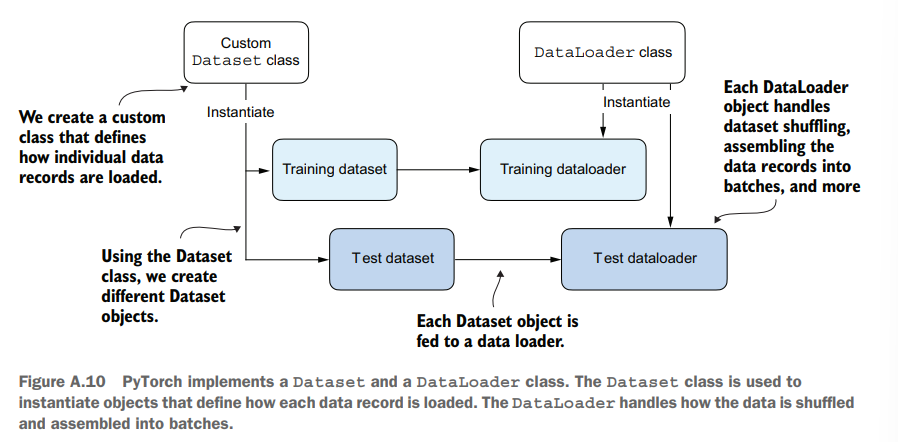

### Toy Dataset

In [ ]:
# Creating a small toy dataset
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],   #   5 training entries with 2 features each
    [2.7, -1.5]
])

y_train = torch.tensor([0,0,0,1,1])  # corresponding class labels

X_test =  torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],    # testing data of 2 entries
])
y_test = torch.tensor([0,1])

NOTE - Pytorch requires the labels to start with 0 and and and the labels should be from the range 0 to N-1 if there are N classes. This is due to the 0 indexing which is there in python. So in here we have 2 classes (0,1) so the labels should start from 0 and cant have a value more than 1

In [ ]:
# Defining a custom dataset class
from torch.utils.data import Dataset

class ToyDataset(Dataset):
  def __init__(self,X,y):  # init constructor
    self.features = X
    self.labels = y

  def __getitem__(self,index):   # getitem method
    one_x = self.features[index]
    one_y = self.labels[index]
    return one_x,one_y

  def __len__(self):   # len method
    return self.labels.shape[0]


In [ ]:
train_ds = ToyDataset(X_train,y_train)
test_ds = ToyDataset(X_test,y_test)

We are setting up attributes in the init constructor which we can use in getitem and len methods. These could be anything, file paths, objects etc. We have created a tensor dataset so we assigned X adn y to these attributes.

In the getitem method, we are returning any 1 value from the dataset in form of an INDEX. This is EXACTLY 1 entry with feature and label.  

Finally the len function returns the length of the dataset for which we have sued the shape function to return the number of rows in the feature array.

Notice that we are actually getting the number of rows in both the training dataset as well as the testing dataset.

In [ ]:
print(len(train_ds))
print(len(test_ds))

5
2


In [ ]:
# Using the Dataloader

from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset = train_ds, # we are still working on the toyset data
    batch_size = 2,
    shuffle = True,   # shuffling of the data
    num_workers = 0  # this is the number of background processes
)

test_loader = DataLoader(
    dataset = test_ds,
    batch_size = 2,
    shuffle = False,  # it is not necessary to shuffle the testing data
    num_workers = 0
)


num_workers is a very important ateribute because if set to 0, the data loading will be done in the main process only and not in any other background. When we work with bigger datasets it will become necessaryy to set it >0 because if set to 0 in that case then for a long time the CPU will do all the tasks and GPU will have to sit idle which will cost us a huge amount of time but when training for a dataset as small as this we dont have to worry about uit as such.


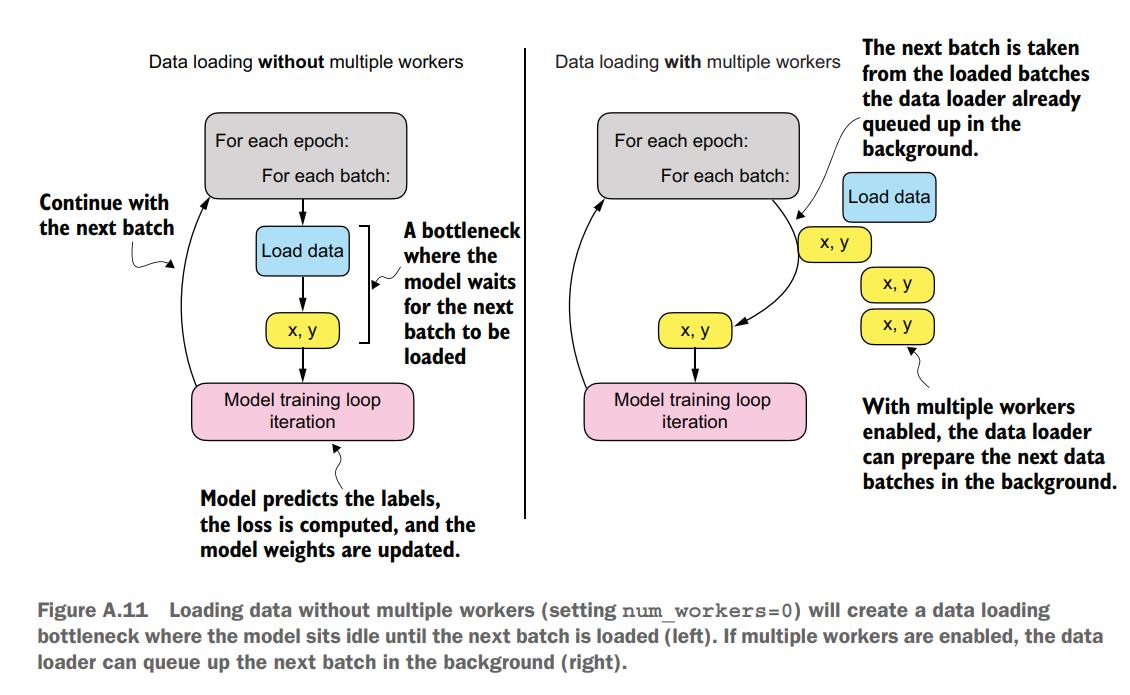

In [ ]:
# iterating over the dataloader

for idx, (x,y) in enumerate(train_loader):
  print(f"batch {idx +1}" , x, y)

batch 1 tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
batch 2 tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
batch 3 tensor([[ 2.7000, -1.5000]]) tensor([1])


**Notice** that dataloader is only visiting an entry exactly once.
This is knon as training epoch.

In [ ]:
# we were getting only 1 entry with a batch size of 2 in the last because 5%2 != 0 so we removed the last thing with
# drop_last = True


train_loader = DataLoader(
 dataset=train_ds,
 batch_size=2,
 shuffle=True,
 num_workers=0,
 drop_last=True
)

### 6. A typical training loop

In [ ]:
# Neural network training in pytorch

import torch.nn.functional as f

torch.manual_seed(123)

model = NeuralNetwork(num_inputs = 2,  num_outputs = 2)
optimizer = torch.optim.SGD(                            #  optimizer is Stochastic Gradient decent (SGD)
    model.parameters(), lr = 0.5                         # model need to know about the parameters
)

num_epochs = 3
for epoch in range(num_epochs):
  model.train()                                         # puts the model into training mode

  for batch_idx, (features,labels) in enumerate(train_loader):

    # error
    logits = model(features)
    loss = f.cross_entropy(logits,labels)               # we directly pass the logits to cross entropy which will internally
                                                        # apply the softmax function for efficiency and numerical stability
    # updating the weights
    optimizer.zero_grad()   # this step is very important to avoid the undesired values of the gradients previously
    loss.backward()                                     # this will calculate the gradients
    optimizer.step()                                    # this will use the gradients to update model parametrs to minimize the loss

    print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
          f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
          f" | Train loss : {loss:0.2f}"
    )

    model.eval()                                        # puts the model into evaluation mode

                                                        # model_tain and eval are necessary settings to avoid unexpected behaviours


Epoch: 001/003 | Batch 000/002 | Train loss : 0.75
Epoch: 001/003 | Batch 001/002 | Train loss : 0.65
Epoch: 002/003 | Batch 000/002 | Train loss : 0.44
Epoch: 002/003 | Batch 001/002 | Train loss : 0.13
Epoch: 003/003 | Batch 000/002 | Train loss : 0.03
Epoch: 003/003 | Batch 001/002 | Train loss : 0.00


### 7. Predictions

In [ ]:
model.eval()
with torch.no_grad():
  outputs = model(X_train)
print(outputs)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


### 8. Probabilities

In [ ]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim = 1)
print(probas)

# this means that [1][1] has 99.91% chances of belonging to class 1 and 0.09% chances of belonging to class 1
predictions = torch.argmax(probas,dim =1)
print(predictions)
predictions == y_train
# this implies that out model is correctly predictiong the output as it got matched witht he labels

tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])
tensor([0, 0, 0, 1, 1])


tensor([True, True, True, True, True])

In [ ]:
# A function to compute the prediction accuracy

def compute_accuracy(model,dataloader):

  model = model.eval()
  correct = 0.0
  total_examples = 0

  for idx, (feature,label) in enumerate(dataloader):

    with torch.no_grad():
      logits = model(features)

    predictions = torch.argmax(logits,dim =1)
    compare = labels == predictions
    correct += torch.sum(compare)
    total_examples += len(compare)

  return (correct/total_examples).item()

In [ ]:
print(compute_accuracy(model,train_loader))
print(compute_accuracy(model,test_loader))

1.0
1.0


### 9. Saving and loading the model

In [ ]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
model2 = NeuralNetwork(2,2)
model2.load_state_dict(torch.load("model.pth"))

<ipython-input-35-4b1b38bc35e4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

In [ ]:
model2(torch.tensor([0,1.]))

tensor([ 0.7043, -1.1841], grad_fn=<ViewBackward0>)